# Airlines Flights Dataset


This dataset captures the relationship between flight booking behaviors, ticket characteristics, and travel patterns. It is useful for analyzing factors that influence ticket prices, flight duration, and airline preferences.

The data contains individual-level entries with details such as ticket class, booking lead time, number of stops, departure and arrival times, flight duration, airline, and average ticket price.

In [1]:
from google.colab import files
files.upload()
#The data is available at #https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data

# Importing libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset
flights=pd.read_csv('airlines_flights_data.csv')

Saving airlines_flights_data.csv to airlines_flights_data.csv


# Dataset overview and basic statistics

In [2]:
flights.head()
#first 5 rows

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
flights.tail()
#last 5 rows

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [4]:
flights.shape
#shape of dataset (rows,columns)

(300153, 12)

This dataset contains 12 columns and 300153 rows

In [5]:
flights.info()
#the columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


All data types are correct, we don't need to change any of them

In [6]:
flights.isnull().sum()
#Do we have null values or not

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


We don't have null values, so we don't need to drop or fill any columns.


In [7]:
flights.nunique()
#the count of unique values each column

,0
index,300153
airline,6
flight,1561
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,476


# Dataset Analysis

## Count of Flights by Airline

In [8]:
flights['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


Vistara has the most flights, SpiceJet has the fewest and let's check the prices.


## Average Price per Airline

In [9]:
flights.pivot_table(index='airline',values='price',aggfunc='mean').round(2).sort_values('price',ascending=False)

,price
airline,
Vistara,30396.54
Air_India,23507.02
SpiceJet,6179.28
GO_FIRST,5652.01
Indigo,5324.22
AirAsia,4091.07


Vistara holds the highest price, while SpiceJet has a high average price even though it has fewer flights.

Let's check Min-Max prices.

## Min-Max Prices Across Airline

In [10]:
flights.pivot_table(index='airline',values='price',aggfunc=['max','min'])

,max,min
,price,price
airline,,
AirAsia,31917,1105
Air_India,90970,1526
GO_FIRST,32803,1105
Indigo,31952,1105
SpiceJet,34158,1106
Vistara,123071,1714


Vistara has the highest ticket prices in terms of both minimum and maximum values, while AirAsia has the lowest in both aspects.

Let's look at the graph in more detail.

## Min-Max Prices by Airline (with Graph)

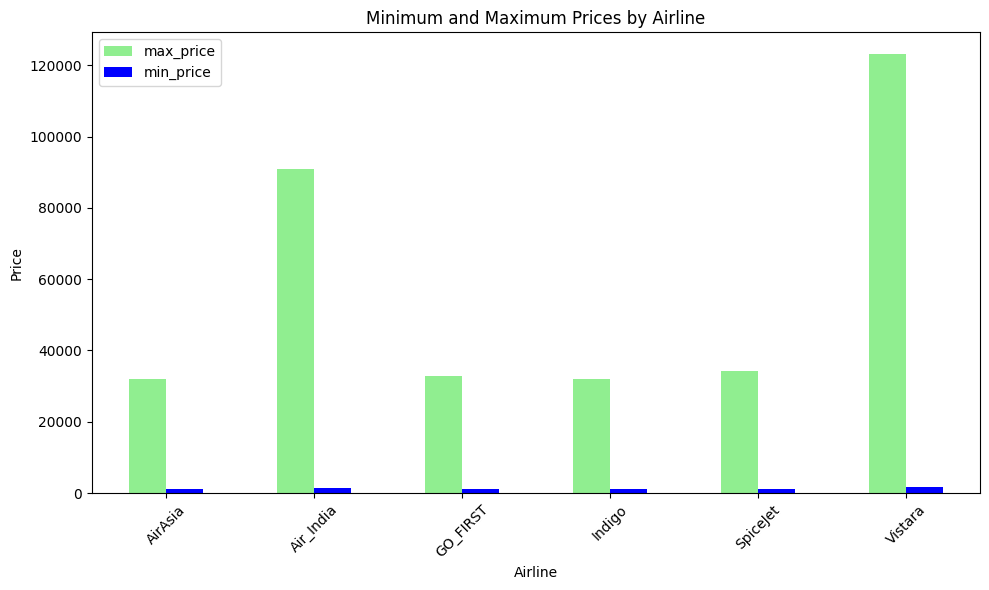

In [11]:
pt=flights.pivot_table(index='airline',values='price',aggfunc=['max','min'])
pt.columns=['max_price','min_price']
pt.plot(kind='bar',figsize=(10, 6), color=['lightgreen', 'blue'])
plt.title('Minimum and Maximum Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the graph, we can see that the prices for Air India and Vistara stand out from the others.

Let's look into the reason for this.

## Price by Travel Class

In [12]:
flights.pivot_table(index=['airline','class'],values='price',aggfunc='mean').round(2)

price
airline   class             
AirAsia   Economy    4091.07
Air_India Business  47131.04
          Economy    7313.68
GO_FIRST  Economy    5652.01
Indigo    Economy    5324.22
SpiceJet  Economy    6179.28
Vistara   Business  55477.03
          Economy    7806.94

Vistara and Air India are the airlines with the highest prices. This is due to the presence of Business Class, which makes their pricing different from other airlines.

In [13]:
flights.pivot_table(index=['class'],values='price',aggfunc='mean').round(2)

,price
class,
Business,52540.08
Economy,6572.34


The high prices are largely driven by Business Class, which averages are highest compared to Economy, significantly affecting the overall fares.

## Price by Stopovers

In [14]:
flights.pivot_table(index=['stops'],values='price',aggfunc='mean').round(2).sort_values('price',ascending=False)

,price
stops,
one,22900.99
two_or_more,14113.45
zero,9375.94


Flights with one stop are the most expensive, followed by flights with two or more stops, while direct flights are the cheapest.

## Price by Departure Time and Arrival Time

### Price by Departure Time

In [15]:
flights.pivot_table(index=['departure_time'],values='price',aggfunc='mean').round(2).sort_values('price',ascending=False)

,price
departure_time,
Night,23062.15
Morning,21630.76
Evening,21232.36
Early_Morning,20370.68
Afternoon,18179.20
Late_Night,9295.30


Flights departing at night are the most expensive, while late-night flights are the cheapest. Morning, evening, early-morning, and afternoon flights fall in between, with prices gradually decreasing.

### Price by Arrival Time

In [16]:
flights.pivot_table(index=['arrival_time'],values='price',aggfunc='mean').round(2).sort_values('price',ascending=False)

,price
arrival_time,
Evening,23044.37
Morning,22231.08
Night,21586.76
Afternoon,18494.60
Early_Morning,14993.14
Late_Night,11284.91


Flights arriving in the evening are the most expensive, while late-night arrivals are the cheapest. Morning, night, afternoon, and early-morning arrivals have prices in between, decreasing gradually.

In [17]:
dep=flights.pivot_table(index=['departure_time'],values='price',aggfunc='mean')['price']
arr=flights.pivot_table(index=['arrival_time'],values='price',aggfunc='mean')['price']

Let's compare departure time and arrival time with graph.

### Price Comparison by Departure and Arrival Time

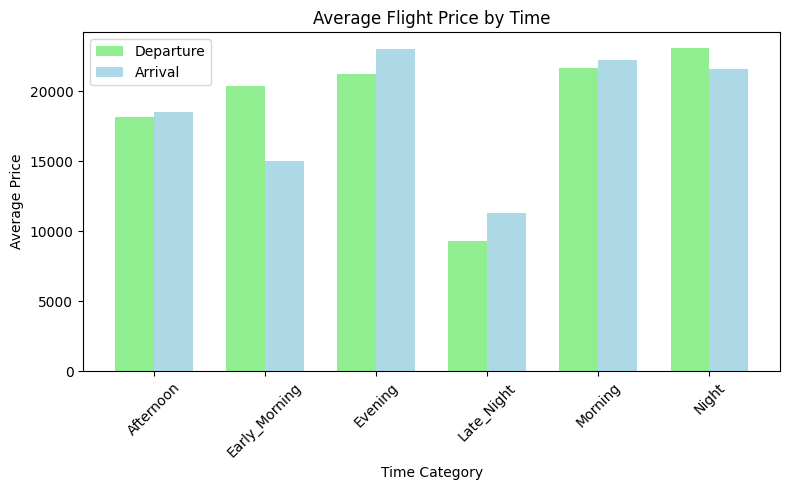

In [18]:
x = np.arange(len(dep))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - width/2, dep.values, width, label='Departure', color='lightgreen')
plt.bar(x + width/2, arr.loc[dep.index].values, width, label='Arrival', color='lightblue')
plt.xticks(x, dep.index, rotation=45)
plt.xlabel('Time Category')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Time')
plt.legend()
plt.tight_layout()
plt.show()

From the graph, we can see that flights departing at night and arriving in the evening have the highest average prices, while late-night departures and arrivals are the cheapest. The highest arrival price occurs in the evening, which corresponds to the second-highest departure price, while the highest departure price occurs at night, which corresponds to the second-highest arrival price. These results suggest that arrival and departure prices are closely related.

## Days Range Categorization

In [19]:
flight_data=flights
flight_data['days_range']=pd.cut(
    flights['days_left'],
    bins=[0, 5, 10, 20, 100],
    labels=['1-5', '6-10', '11-20', '20+']
)
flight_data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days_range
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,1-5
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,1-5
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1-5
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,1-5
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,1-5


## Price by Days Range Category

In [20]:
flight_data.pivot_table(index=['days_range'],values='price',aggfunc='mean', observed=False).round(2).sort_values('price',ascending=False)

,price
days_range,
1-5,27132.16
6-10,25326.88
11-20,21260.48
20+,19387.85


Tickets bought earlier are cheaper, and prices go up as the days left decrease.

## Dominant Airline and Source City on Price

In [21]:
df_grouped=flights.groupby(['airline', 'source_city'])['price'].mean().round(2).reset_index(name='price').sort_values('price', ascending=False).drop_duplicates(subset='airline', keep='first')
df_grouped

,airline,source_city,price
34,Vistara,Kolkata,32794.28
7,Air_India,Chennai,25415.50
28,SpiceJet,Kolkata,6852.89
16,GO_FIRST,Kolkata,6638.82
22,Indigo,Kolkata,6223.83
2,AirAsia,Delhi,4514.85


Let's look at the graph in more detail.

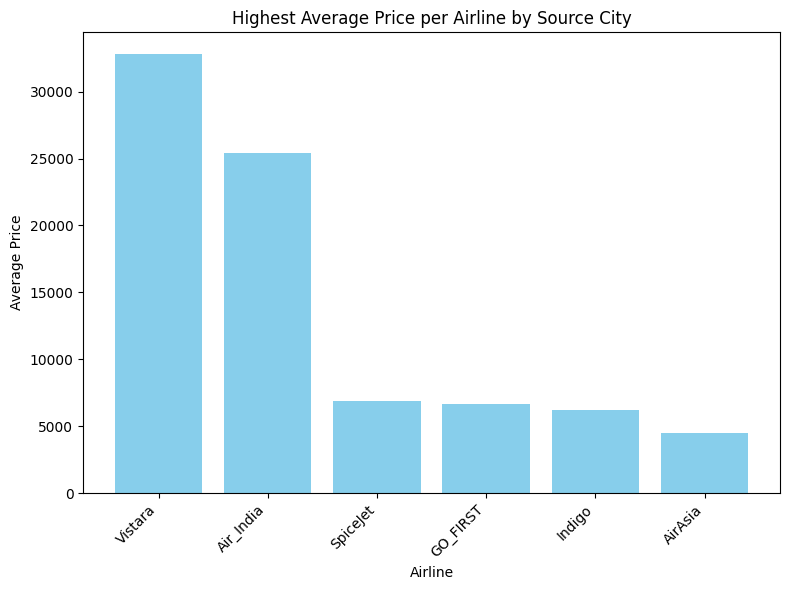

In [22]:
plt.figure(figsize=(8,6))
plt.bar(df_grouped['airline'], df_grouped['price'], color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Highest Average Price per Airline by Source City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

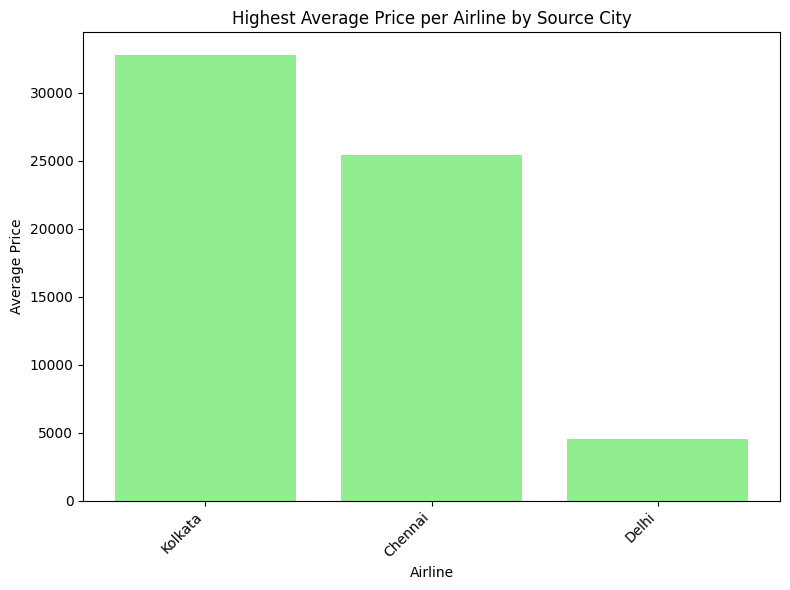

In [23]:
plt.figure(figsize=(8,6))
plt.bar(df_grouped['source_city'], df_grouped['price'], color='lightgreen')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Highest Average Price per Airline by Source City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Only three cities have the highest prices, with Vistara and Air India clearly higher than the other airlines on average.

## Price by Source City and Destination City

In [24]:
flights.groupby(['source_city','destination_city'])['price'].mean().round(2).sort_values(ascending=False).head(10)

source_city  destination_city
Chennai      Bangalore           25081.85
Kolkata      Chennai             23660.36
Bangalore    Kolkata             23500.06
             Chennai             23321.85
Mumbai       Bangalore           23147.87
Bangalore    Mumbai              23128.62
Mumbai       Chennai             22781.90
Chennai      Mumbai              22765.85
Kolkata      Bangalore           22744.81
Chennai      Kolkata             22669.93
Name: price, dtype: float64

Let’s take a closer look.

## Duration by Source City and Destination City

In [25]:
flights.groupby(['source_city','destination_city'])['duration'].mean().round(2).sort_values(ascending=False).head(10)

source_city  destination_city
Kolkata      Chennai             14.77
Chennai      Kolkata             14.52
Bangalore    Chennai             14.48
             Hyderabad           14.16
Chennai      Bangalore           13.95
Kolkata      Hyderabad           13.85
             Bangalore           13.79
Hyderabad    Kolkata             13.54
             Chennai             13.29
Mumbai       Hyderabad           13.26
Name: duration, dtype: float64

If the duration is long, it usually means the distance between cities is greater, so the plane travels more. However, we cannot say that the price difference depends on duration, because looking at the top 10, the Chennai -> Kolkata route has a relatively low cost but a long duration.

Let’s find out the factors affecting duration.

## Duration by Airline

In [26]:
flights.pivot_table(index=['airline'],values='duration',aggfunc='mean').round(2).sort_values('duration',ascending=False)

,duration
airline,
Air_India,15.50
Vistara,13.33
SpiceJet,12.58
AirAsia,8.94
GO_FIRST,8.76
Indigo,5.80


Air_India and Vistara have the longest average flight durations, while Indigo has the shortest. Vistara and Air_India also offer business class options, so now let’s take a closer look at this.

## Duration by Travel Class

In [27]:
flights.groupby(['class'])['duration'].mean().round(2).sort_values(ascending=False)

,duration
class,
Business,13.70
Economy,11.55


The average flight duration is higher for Business class compared to Economy. This means that the class of the ticket affects both the price and the duration of the flight.

## Duration by Stopovers

In [28]:
flights.pivot_table(index=['stops'],values='duration',aggfunc='mean').round(2).sort_values('duration',ascending=False)

,duration
stops,
two_or_more,15.32
one,13.50
zero,2.19


Flights with two or more stops have the longest average duration, followed by flights with one stop and non-stop flights are the shortest. This shows that as the number of stops decreases, the flight duration also decreases, meaning the number of stops strongly affects the duration.”

## Duration by Arrival Time and Departure Time

### Duration by Arrival Time

In [29]:
flights.pivot_table(index=['arrival_time'],values='duration',aggfunc='mean').round(2).sort_values('duration',ascending=False)

,duration
arrival_time,
Morning,13.94
Evening,12.62
Early_Morning,12.56
Night,11.52
Afternoon,11.39
Late_Night,8.73


Flights arriving in the morning have the longest average duration, while late-night flights have the shortest.

### Duration by Departure Time

In [30]:
flights.pivot_table(index=['departure_time'],values='duration',aggfunc='mean').round(2).sort_values('duration',ascending=False)

,duration
departure_time,
Night,14.12
Evening,13.64
Early_Morning,11.59
Morning,11.30
Afternoon,10.76
Late_Night,7.32


Flights departing at night have the longest average duration, while late-night departures are the shortest.

In [31]:
dep=flights.pivot_table(index=['departure_time'],values='duration',aggfunc='mean')['duration']
arr=flights.pivot_table(index=['arrival_time'],values='duration',aggfunc='mean')['duration']

Let's compare departure time and arrival time with graph.

### Duration Comparison by Departure and Arrival Time

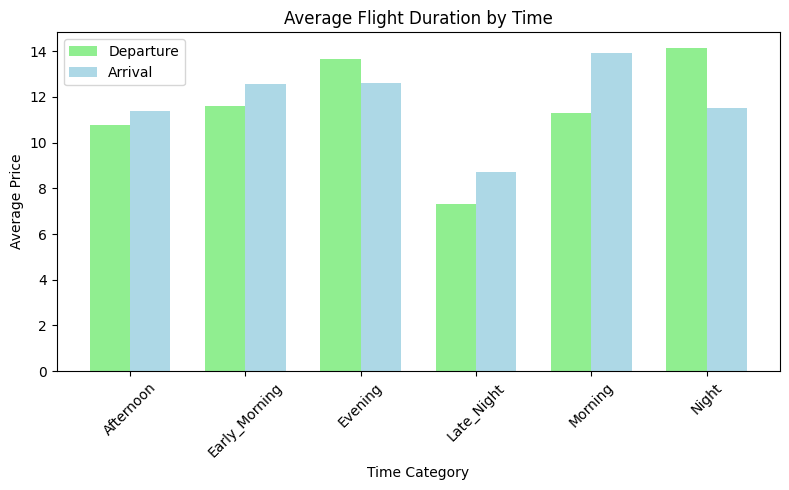

In [32]:
x = np.arange(len(dep))
width = 0.35
plt.figure(figsize=(8,5))
plt.bar(x - width/2, dep.values, width, label='Departure', color='lightgreen')
plt.bar(x + width/2, arr.loc[dep.index].values, width, label='Arrival', color='lightblue')
plt.xticks(x, dep.index, rotation=45)
plt.xlabel('Time Category')
plt.ylabel('Average Price')
plt.title('Average Flight Duration by Time')
plt.legend()
plt.tight_layout()
plt.show()

Comparing flight duration by departure and arrival times, we see that night departures have the longest flights, while late-night departures are the shortest. Similarly, flights arriving in the morning take the longest, and late-night arrivals are the shortest. This shows that both departure and arrival times influence flight duration, with later departures and earlier arrivals generally associated with longer flights.

## Conclusion

In conclusion, the ticket class has the greatest impact on price, with Business class being more expensive than Economy. Additionally, the earlier a ticket is purchased, the cheaper it tends to be. Other factors, such as flight duration, number of stops, departure time, and arrival time, also affect the price, but their influence is less significant compared to class and booking time. Flights with more stops and longer durations generally cost more, and night departures or morning arrivals are associated with longer flights, which can slightly increase the price.